In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from growth.sweep.sweep import Sweep
from clones.validation.sweep import SweepBenchmark
%matplotlib inline

In [2]:
ls ../../../data/synthetic/

Sweep_181201_191516/ build_sweep.py       old/
aggregate.py         landing/


# Load synthetic benchmarking results

In [2]:
sweep_path = '../../../data/synthetic/Sweep_181201_191516'
sweep = Sweep.load(sweep_path)
sweep

1 x 16 sweep, 4 recombination generations

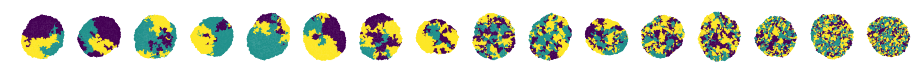

In [9]:
# plot single replicate for each batch
fig = sweep.plot_culture_grid(replicate_id=0, s=2)

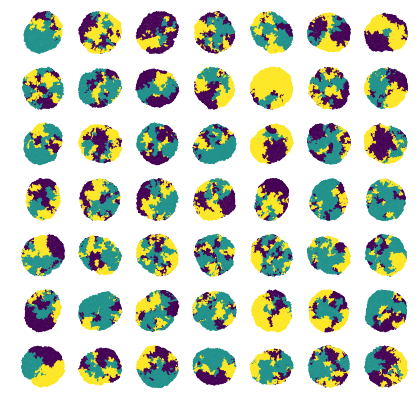

In [10]:
# plot all replicates for a single batch
fig = sweep.batches[0, 4].plot_culture_grid()

# load benchmarking results

In [162]:
benchmark = SweepBenchmark.load(sweep_path)

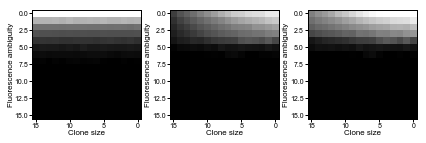

In [13]:
fig = benchmark.results.plot_absolute_error(log=True)

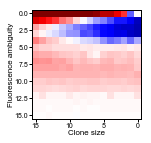

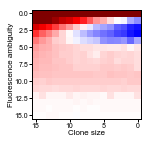

In [18]:
fig = benchmark.results.plot_relative_error(method='katz', reference_method='simple')
fig = benchmark.results.plot_relative_error(method='community', reference_method='simple')

In [27]:
batch_id, ambiguity_id = 0, 5
batch_benchmark = benchmark.load_benchmark(batch_id, ambiguity_id)

simple  community      katz
growth_replicate fluorescence_replicate                               
0                0                       0.207633   0.206534  0.210289
1                0                       0.194747   0.243530  0.243923
2                0                       0.195130   0.234089  0.241337
3                0                       0.212776   0.233627  0.208819
4                0                       0.205507   0.218983  0.210868
5                0                       0.199043   0.225508  0.205207
6                0                       0.212919   0.218975  0.211779
7                0                       0.199929   0.219338  0.218219
8                0                       0.208841   0.224257  0.211051
9                0                       0.203155   0.239642  0.252092
10               0                       0.204766   0.237863  0.252070
11               0                       0.198223   0.209086  0.212843
12               0                       0.195330   0.226983  0.210825
13               0                       0.198461   0.183383  0.212248
14               0                       0.201894   0.222122  0.207362
15               0                       0.212054   0.324475  0.293849
16               0                       0.197984   0.199817  0.197977
17               0                       0.205015   0.214671  0.212023
18               0                       0.204439   0.204485  0.210133
19               0                       0.199343   0.223518  0.215861
20               0                       0.203987   0.213063  0.211716
21               0                       0.210697   0.243596  0.241351
22               0                       0.203189   0.221045  0.203865
23               0                       0.196711   0.210510  0.201247
24               0                       0.199696   0.214984  0.202805
25               0                       0.193077   0.181736  0.192639
26               0                       0.198877   0.208010  0.205644
27               0                       0.194448   0.213890  0.199072
28               0                       0.202518   0.223458  0.208119
29               0                       0.207392   0.215730  0.217194
30               0                       0.189934   0.198094  0.243470
31               0                       0.192828   0.206143  0.201265
32               0                       0.209091   0.224871  0.213364
33               0                       0.206712   0.241743  0.247879
34               0                       0.185131   0.328810  0.326429
35               0                       0.202152   0.257213  0.247087
36               0                       0.200235   0.209435  0.202361
37               0                       0.200917   0.201981  0.209564
38               0                       0.217742   0.260906  0.214441
39               0                       0.197076   0.214245  0.198861
40               0                       0.191160   0.211831  0.204531
41               0                       0.203730   0.236421  0.223001
42               0                       0.200549   0.234073  0.244638
43               0                       0.215063   0.254548  0.250983
44               0                       0.195905   0.216699  0.213302
45               0                       0.199304   0.206120  0.193648
46               0                       0.201839   0.199010  0.201345
47               0                       0.201155   0.219455  0.215531
48               0                       0.196025   0.218227  0.208476
49               0                       0.197687   0.192438  0.195481

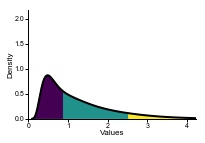

In [24]:
batch_benchmark.classifier.plot_pdf()

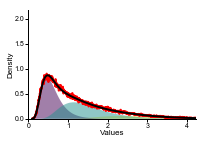

In [33]:
batch_benchmark.classifier.plot_pdfs()

In [163]:
batch_id, ambiguity_id = 0, 5

batch_benchmark = benchmark.load_benchmark(batch_id, ambiguity_id)

In [3]:
simulation = sweep[0]

In [172]:
from clones.validation.simulation import SimulationBenchmark

benchmark = SimulationBenchmark(measurements, logratio=True, twolevel=True)

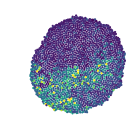

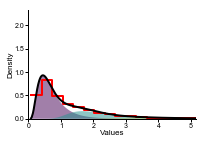

In [176]:
benchmark.plot_measurements()

benchmark.cell_classifier.plot_pdfs()

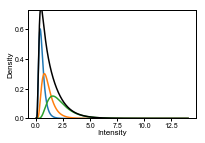

In [194]:
fluorescence.show_pdf()

In [251]:
measurements = simulation.measure(ambiguity=.5)

In [253]:
simulation.xy.shape

(2136, 2)

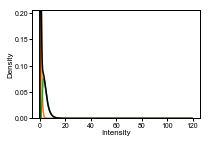

In [268]:
fluorescence.show_pdf()

# TESTING

In [2]:
from sklearn.cluster import AgglomerativeClustering
import networkx as nx
from clones.spatial.graphs import WeightedGraph
from sklearn.cluster import spectral_clustering
from growth.measure.fluorescence import Fluorescence

In [3]:
sweep_path = '../../../data/synthetic/Sweep_181201_191516'
sweep = Sweep.load(sweep_path)
simulation = sweep[5]

1 x 16 sweep, 4 recombination generations

In [426]:
measurements = simulation.measure(ambiguity=.4)

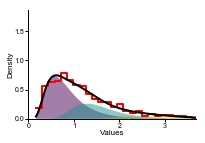

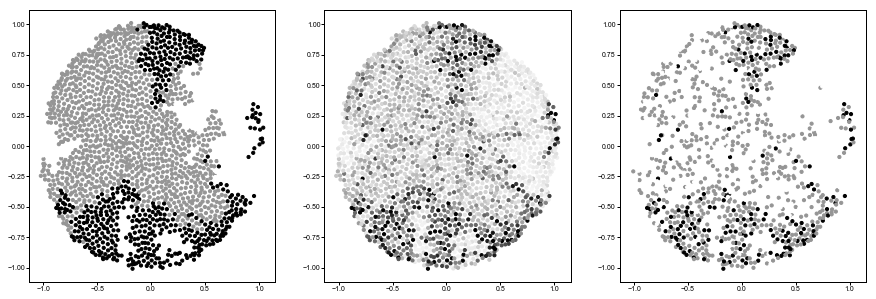

In [429]:
from clones.annotation.bayesian import BayesianClassifier

model = BayesianClassifier(measurements.fluorescence.values, crop=True)
model.plot_pdfs()

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 5))
_ = ax0.scatter(*simulation.xy.T, c=measurements.ground, s=10, cmap=plt.cm.Greys)
_ = ax1.scatter(*simulation.xy.T, c=measurements.fluorescence.values, s=10, cmap=plt.cm.Greys, vmin=0, vmax=3)
_ = ax2.scatter(*simulation.xy.T, c=model.classifier(measurements.fluorescence.values), s=10, cmap=plt.cm.Greys)

In [417]:
clustering = AgglomerativeClassifier(measurements, n=25, num_labels=5, logratio=True)

In [418]:
centroids = {i:[] for i in range(clustering.num_labels)}
for i, x in enumerate(clustering.means):
    centroids[clustering.component_to_label[i]].append(x)

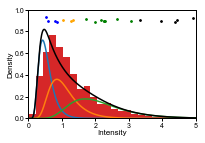

In [419]:
fig, ax = plt.subplots(figsize=(3, 2))
fluorescence.show_pdf(ax=ax)

ax.set_xlim(0, 5)
ax.set_ylim(0, 1)

colors = {0: 'blue', 1: 'orange', 2: 'green'}
for i in range(3, clustering.num_labels):
    colors[i] = 'k'

for i, centroid in centroids.items():
    ax.scatter(centroid, [.9+np.random.normal(scale=0.01) for _ in centroid], c=colors[i], s=3)

_ = ax.hist(measurements.fluorescence.values, bins=np.linspace(-1, 9, 50), density=True)

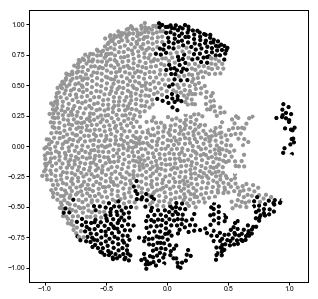

In [420]:
fig, ax = plt.subplots(figsize=(5, 5))
_ = ax.scatter(*simulation.xy.T, c=clustering.labels, s=10, cmap=plt.cm.Greys, vmin=0, vmax=2)

In [333]:
all_centroids = np.log(np.hstack(list(centroids.values())))

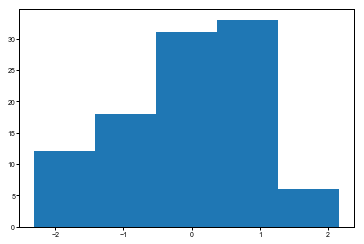

In [338]:
zscores = (all_centroids - all_centroids.mean()) / all_centroids.std()

_ = plt.hist(zscores, bins=5)

In [145]:
from sklearn.cluster import k_means


from clones.annotation.classifiers import Classifier

In [291]:
class AgglomerativeClassifier(BayesianClassifier):
    
    def __init__(self, measurements,
                 classify_on='fluorescence',
                 n=3,
                 logratio=True,
                 distance=False,
                 **kwargs):
        """
        Fit a cell classifier to an array of values.

        Args:

            measurements (pd.DataFrame) - measurement data

            classify_on (str) - measurement attribute from which values came

            logratio (bool) - if True, weight edges by logratio of expression difference
            
            distance (bool) - if True, weight edges by difference rather than similarity

        Keyword arguments:

            n (int) - number of clusters

            log (bool) - indicates whether clustering performed on log values

            cmap (matplotlib.colors.ColorMap) - colormap for class_id

        Returns:

            classifier (CellClassifier)

        """
                
        # extract values
        values = measurements[classify_on].values

        # instantiate classifier
        Classifier.__init__(self, values, n=n, **kwargs)
        self.support = np.sort(values)

        # store parameters
        self.classify_on = classify_on
        self.parameters['classify_on'] = classify_on
        
        # build graph
        self.logratio = logratio
        self.distance = distance
        self.graph = self.build_graph(measurements)

        # fit model
        self.model = self._fit(values, self.graph, self.n)

        # assign labels
        component_to_label = np.vectorize(self.component_to_label.get)
        self.labels = component_to_label(self.model.labels_)

    @property
    def means(self):
        """ Mean of each cluster. """
        from scipy.ndimage.measurements import mean
        return mean(self.values, labels=self.model.labels_, index=range(self.n))
    
    @property
    def component_to_label(self):
        """ Returns dictionary mapping components to labels.  """
        n = self.num_labels
        component_means = np.log10(self.means.reshape(-1,1))
        cluster_means, cluster_labels, _ = k_means(component_means, n)
        component_to_label = {}
        for label, c in enumerate(np.argsort(cluster_means.ravel())):
            for d in (cluster_labels==c).nonzero()[0]:
                component_to_label[d] = label
        return component_to_label
    
    def build_graph(self, measurements):
        """ 
        Construct graph linking measurements. 
        
        Args:
            
            measurements (pd.DataFrame) - measurement data            
        
        """
        graph = WeightedGraph(measurements, 
                              weighted_by=self.classify_on, 
                              logratio=self.logratio, 
                              distance=self.distance)
        return graph
        
    @staticmethod
    def _fit(values, graph, n=3):
        """
        Fit log-normal mixture model using likelihood maximization.

        Args:

            values (np.ndarray[float]) - values
            
            graph (clones.spatial.Graph) - graph connecting measurements

            n (int) - number of log-normal distributions

        Returns:

            clusters (sklearn.AgglomerativeClustering)

        """
        
        # build adjacency matrix
        connectivity = nx.adjacency_matrix(graph.get_networkx(), nodelist=graph.df.index.values)
        
        # perform agglomerative clustering
        clustering = AgglomerativeClustering(n_clusters=n, connectivity=connectivity)
        clusters = clustering.fit(values.reshape(-1, 1))
            
        return clusters

In [77]:
clusters.n_components_

1

In [22]:
edge_weights = graph.evaluate_edge_weights('fluorescence')

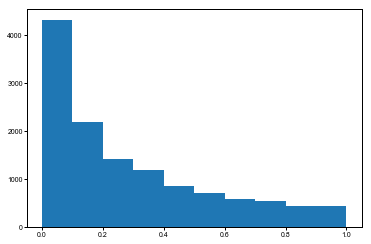

In [23]:
_ = plt.hist(edge_weights**2)

In [25]:
import networkx as nx

<function networkx.algorithms.link_analysis.pagerank_alg.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)>

In [26]:
pageranks = np.array([x[1] for x in sorted(nx.pagerank(G, weight='weight').items())])
degrees = np.array([x[1] for x in sorted(nx.degree(G, weight='weight'))])
katz = np.array([x[1] for x in sorted(nx.katz_centrality(G, weight='weight').items())])

In [38]:
import networkx as nx

In [313]:
model = fit(x, n_init=1000)

In [314]:
np.exp(model.weights)

array([0.42954107, 0.17189121, 0.39856772])

In [311]:
def fit(values, n=3, n_init=1000):
    select_between = lambda xx, b: xx[(xx>=b[0]) * (xx<=b[1])]
    bounds = np.percentile(values, q=[0.1, 99.9])
    values = select_between(values, bounds)

    args = (LogNormalDistribution, n, values.reshape(-1, 1))
    
    weights = np.ones(values.size)
    
    kwargs = dict(n_init=n_init, weights=weights)
    return GeneralMixtureModel.from_samples(*args, **kwargs)

array([1, 1, 1, ..., 1, 2, 2])

In [245]:
selector = ModelSelection(x, classify_on='fluorescence')

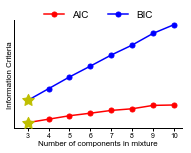

In [246]:
selector.plot_information_criteria()

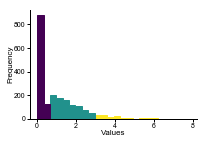

In [264]:
model.show()

In [233]:
from clones.annotation.model_selection import ModelSelection

In [219]:

from growth.measure.fluorescence import Fluorescence
from clones.annotation.bayesian import BayesianClassifier

In [204]:
np.logspace(-1, 1, base=2, num=3)


array([0.5, 1. , 2. ])

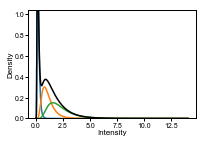

In [217]:
fluorescence = Fluorescence(0.5, mu=[.2, 1., 2.])
fluorescence.show_pdf()

In [28]:
classifier = batch_benchmark.classifier

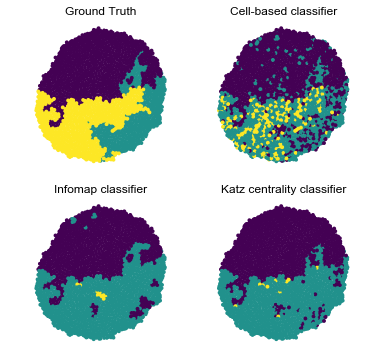

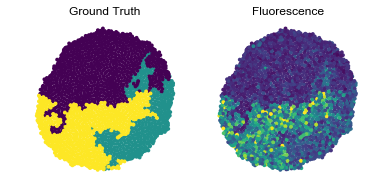

In [129]:
batch_benchmark.katz_kwargs['alpha'] = 0.9
simulation_benchmark = batch_benchmark.benchmark_simulation(0)
simulation_benchmark.show_classifiers(s=15)
simulation_benchmark.show_measurements(s=15)

In [130]:
print('Simple: {:0.3f}'.format(simulation_benchmark.scores['simple'].MAE))
print('Community: {:0.3f}'.format(simulation_benchmark.scores['community'].MAE))
print('Katz: {:0.3f}'.format(simulation_benchmark.scores['katz'].MAE))

Simple: 0.200
Community: 0.195
Katz: 0.205


In [ ]:
sweep.l

(0, 2.6)

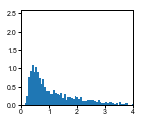

In [155]:
fig, ax = plt.subplots(figsize=(2, 1.75))
x = benchmark.fluorescence

_ = ax.hist(x, bins=100, density=True)
_ = ax.set_xlim(0, 4)
ax.set_ylim(0, 2.6)

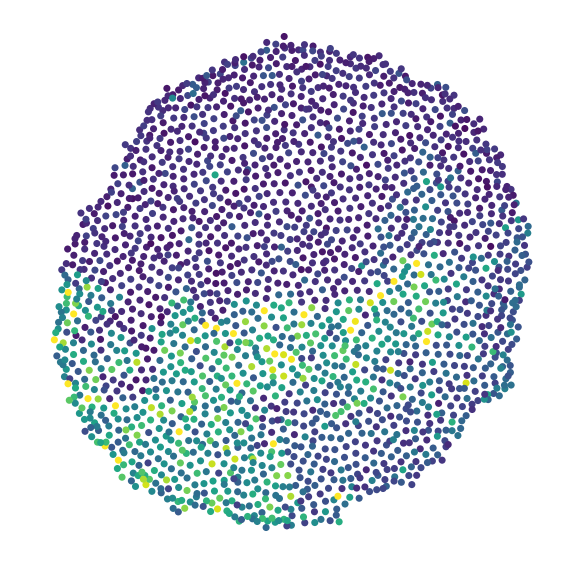

In [160]:
fig, ax = plt.subplots(figsize=(10, 10))
benchmark.plot_measurements(ax=ax, s=50)

In [ ]:
benchmark.

In [430]:
from scipy.stats import lognorm

(0, 5)

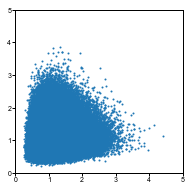

In [513]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(*sample.T, s=1)

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

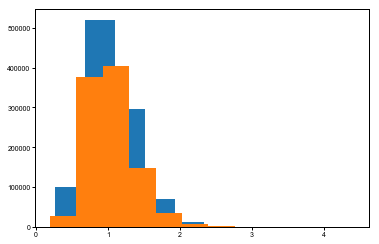

In [515]:
im = sample.reshape((dim, dim, -1)).T
_ = plt.hist(im[0].ravel())
_ = plt.hist(im[1].ravel())

In [538]:
xy = np.array([500, 500])
cell = Cell(xy, 0)

In [10]:
from growth.measure import FluorescenceSampler

In [3]:
sweep_path = '../../../data/synthetic/Sweep_181201_191516'
sweep = Sweep.load(sweep_path)
simulation = sweep[5]

In [6]:
from skimage.morphology import disk

In [552]:
from copy import deepcopy


class Nucleus:
    
    def __init__(self, xy, mu, sigma=0.1, radius=6):
        self.xy = xy.astype(np.uint16)
        self.radius = radius
        if type(mu) in (float, int, np.float64):
            mu = np.array([mu])
        self.mu = mu
        if type(sigma) in (float, int, np.float64):
            sigma = np.array([sigma])
        self.sigma = sigma
        self.circle_mask = disk(self.radius).astype(bool)
        self.build_fill_indices()
    
    @property
    def num_pixels(self):
        return self.circle_mask.sum()
    
    @property
    def num_channels(self):
        return self
            
    def build_fill_indices(self):
        """ Build fill indices. """
        xx, yy = np.array(np.meshgrid(*2*(range(-self.radius, self.radius+1),)))
        xx += self.xy[0]
        yy += self.xy[1]
        self.fill_indices = (xx[self.circle_mask].ravel(), yy[self.circle_mask].ravel())
    
    def draw_fluorescence(self, image):
        """ Draw pixels sampled from a lognormal distribution on <image>. """
        for channel in range(image.num_channels):
            mu = np.log(self.mu[channel])
            pixels = np.random.lognormal(mu, sigma=self.sigma, size=self.num_pixels)
            self._draw(image.im[channel], fill_value=pixels)
    
    def _draw(self, im, fill_value):
        """ Insert <fill_value> in <im>. """
        im[self.fill_indices] = fill_value
    
    def add_fluorescence(self, image):
        """ Draw pixels sampled from a lognormal distribution on <image>. """
        for channel in range(image.num_channels):
            mu = np.log(self.mu[channel])
            pixels = np.random.lognormal(mu, sigma=self.sigma, size=self.num_pixels)
            self._add(image.im[channel], fill_value=pixels)
    
    def _add(self, im, fill_value):
        """ Add <fill_value> to <im>. """
        im[self.fill_indices] = im[self.fill_indices] + fill_value
        



In [568]:
im = np.zeros((5,10,10))
im.shape[-2:]

(10, 10)

In [2]:
class ScalarImage:
    """
    Class containing a scalar image.
    """
    
    def __init__(self, height=1000, width=1000):
        """ Instantiate scalar image with shape (<height>, <width>). """
        self.height = height
        self.width = width
        self.initialize()
    
    @property
    def shape(self):
        """ Image shape. """
        return self.im.shape[-2:]
    
    @property
    def pixels(self):
        """ Returns image pixels. """
        return self.im.ravel()
    
    def initialize(self):
        """ Initialize blank image. """
        self.im = np.zeros((self.height, self.width), dtype=np.float64)
    
    def fill(self, mu=0.1, sigma=0.1):
        """ Fill background with values sampled from a lognormal distribution. """
        pixels = np.exp(np.random.normal(np.log(mu), sigma, size=self.shape))        
        self.im[:, :] = pixels
    
    def render(self, size=5, vmin=0, vmax=3, cmap=plt.cm.Greys, ax=None):
        """ Render image. """
        if ax is None:
            fig, ax = plt.subplots(figsize=(size, size))
        ax.imshow(self.im.T, vmin=vmin, vmax=vmax, cmap=cmap)
        ax.invert_yaxis()
        ax.axis('off')
        
    def center_xycoords(self, xy, shrinkage=0.8):
        """ Project zero-centered xy to center of image. """
        center_x = self.shape[0]/2
        center_y = self.shape[1]/2
        centered_xy = deepcopy(xy)
        centered_xy[:, 0] = ((xy[:, 0]*center_x*shrinkage) + center_x).astype(np.uint16)
        centered_xy[:, 1] = ((xy[:, 1]*center_y*shrinkage) + center_y).astype(np.uint16)        
        return centered_xy

    
class DependentScalarImage(ScalarImage):
    """
    Class defines a scalar image whose pixel intensities are sampled with some dependence upon another scalar image.
    """
    
    def __init__(self, pixels):
        """ Instantiate a dependent scalar image. """
        super().__init__(*pixels.shape)
        self.sampler = ConditionalLogSampler(pixels.ravel())
        
    def fill(self, mu=0.5, sigma=0.1, rho=0.0):
        """ Generate randomly sampled pixel values. """
        pixels = self.sampler.sample(mu, sigma, rho=rho)
        self.im[:, :] = pixels.reshape(self.shape)


In [58]:
sampler = LognormalSampler(10, 1)
x = sampler.sample(10000)
np.log(x).mean()

2.2777590862385915

In [62]:
np.random.lognormal

<function RandomState.lognormal>

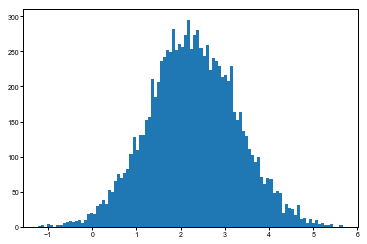

In [61]:
_ = plt.hist(np.log(x), bins=100)

In [10]:
from growth.measure.fluorescence import LognormalSampler


In [15]:
np.random.lognormal(mean=np.log(10), sigma=.1, size=1000)

array([11.85387326,  8.61817852,  9.32672307, 11.58836449,  9.01127572,
        8.12314641,  9.64053564,  8.80316311, 10.66273609,  9.9600501 ,
       10.48941972, 10.74184499, 10.78352057, 12.37528011,  8.75813907,
        9.7126515 ,  8.8812855 , 13.42057262, 10.6009753 , 10.41058999,
       10.21582358,  9.64247941,  9.69242172, 10.48640665, 12.14550057,
        9.46447657, 11.68012813, 11.38576114, 10.03967733,  9.2474732 ,
        8.60480606,  8.24272409, 10.37204041,  8.62710348,  8.91830196,
       10.30384751,  9.669757  , 10.4009126 ,  8.51098424, 11.75842873,
        8.44242133,  8.94480935,  8.4875074 ,  8.4725151 ,  9.64883048,
       11.32270053,  8.91963473, 10.69293642,  9.12329124, 10.61905323,
        8.55459608, 10.21948852, 10.69362346,  9.2458617 ,  9.63368542,
       12.11826494,  8.60014168,  7.89262447, 10.92411748,  9.53352247,
        9.39496837, 11.68416305, 11.06045376,  9.12586463, 10.31762669,
        9.38440986, 10.63310646, 10.90009583, 10.9752424 , 10.23

In [4]:
from scipy.stats import lognorm

In [ ]:
lognorm()

In [ ]:
bg=0.5, bg_noise=0.5

In [532]:
class SyntheticImage(ScalarImage):
    """
    Class allows for construction of a synthetic image based on a simulated cell culture.

    """

    def __init__(self, simulation, height=1000, width=1000):
        """ 
        Instantiate synthetic image from a growth simulation instance. 
        """        
        self.depth = 3
        super().__init__(height=height, width=width)
    
        # define nuclear positions and genotypes
        self.centroids = self.center_xycoords(simulation.xy.T)
        self.genotypes = simulation.genotypes
    
    def __getitem__(self, idx):
        """ Returns ScalarImage indexed by <idx>. """
        return self.im[idx]
    
    def initialize(self):
        """ Initialize blank image. """
        self.im = np.zeros((self.depth, self.height, self.width), dtype=np.float64)
        
    def fill(self, channel, mu=0.1, sigma=0.1):
        """ Fill image channel with values sampled from a lognormal distribution. """
        pixels = np.exp(np.random.normal(np.log(mu), sigma, size=self.shape))        
        self.im[channel, :, :] = pixels
    
    def build_nuclear_stain(self, expression_noise=0.5, measurement_noise=0.5):
        """ Build synthetic image of nuclear stain. """
        
        # insantiate fluorescence generator
        fluorescence = Fluorescence(expression_noise)
        
        
        
        levels = fluorescence(np.ones(self.genotypes.size)*2)
        
        # add background noise
        self.fill(channel=0, MU, SIGMA)
        
        # draw nuclei
        for i in range(self.centroids.shape[1]):
            nucleus = Nucleus(xy=self.centroids.T[i], mu=levels[i], sigma=measurement_noise)
            indices = nucleus.draw_fluorescence(image)
                
    def build_clonal_marker(self, ambiguity=0.1, noise=0.5):
        """ Builds image of clonal marker fluorescence. """
        
        fluorescence = Fluorescence(ambiguity)
        levels = fluorescence(self.genotypes)
        
        # instantiate image
        image = self.initialize_image()
        
        # add nuclei
        for i in range(self.xy.shape[1]):
            nucleus = Nucleus(xy=self.xy.T[i], mu=levels[i], sigma=noise)
            indices = nucleus.draw_fluorescence(image)
        
        # store image
        self.images[1] = image
        
    def build_control(self, rho, mu=0.5, sigma=0.5, noise=0.5):
        """ Builds image of clonal marker fluorescence. """
        image = ConditionalImage(self.images[1])
        image.resample(mu=mu, sigma=sigma, rho=rho)
                
        # add weak nuclear stain
        fluorescence = Fluorescence(.1, mu=[.5, 1., 2.])
        levels = fluorescence(np.ones(self.genotypes.size)*0)
        for i in range(self.xy.shape[1]):
            nucleus = Nucleus(xy=self.xy.T[i], mu=levels[i], sigma=noise)
            indices = nucleus.add_fluorescence(image)
    
        self.images[2] = image
    
    def build(self, ambiguity=0.1, rho=0.1):
        self.build_nuclear_stain_image()
        self.build_clonal_marker_image(ambiguity=ambiguity)
        self.build_control_image(rho=rho)
        
    def render(self, size=8):
        figsize = (3*size + 1, size)
        fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=figsize)
        self.images[0].render(ax=ax0)
        self.images[1].render(ax=ax1)
        self.images[2].render(ax=ax2)

In [ ]:
from growth.measure.fluorescence import L

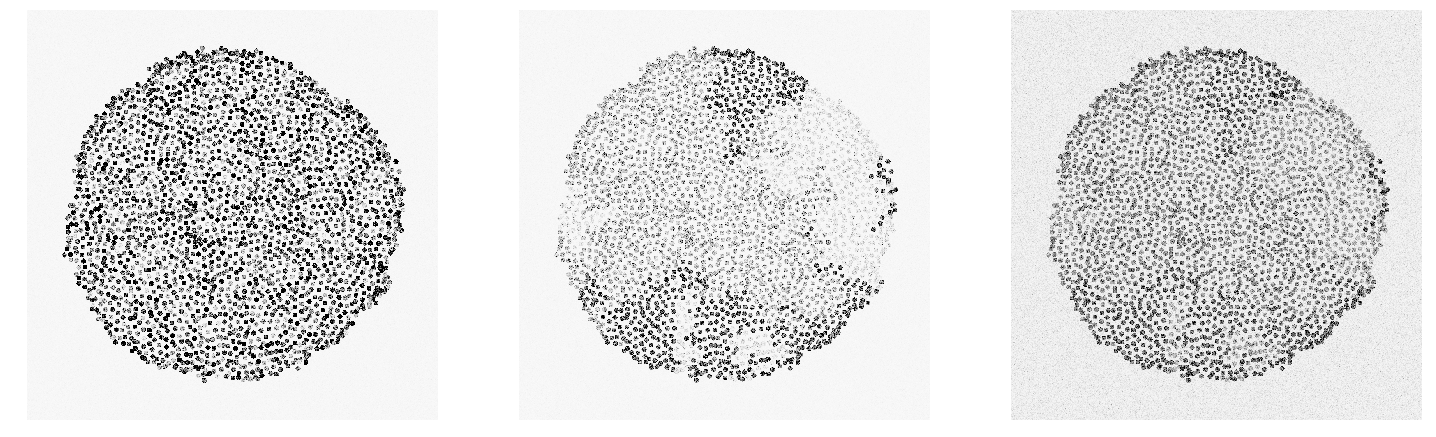

In [536]:
simage = SimulationImage(simulation, bg=0.2, bg_noise=0.2)
simage.build(ambiguity=0.1, rho=.8)
simage.render()

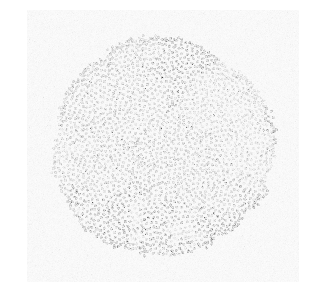

In [537]:
simage[2].render(vmin=0, vmax=8)

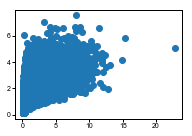

In [538]:
fig, ax = plt.subplots(figsize=(3, 2))
ax.scatter(simage[1].pixels, simage[2].pixels) 

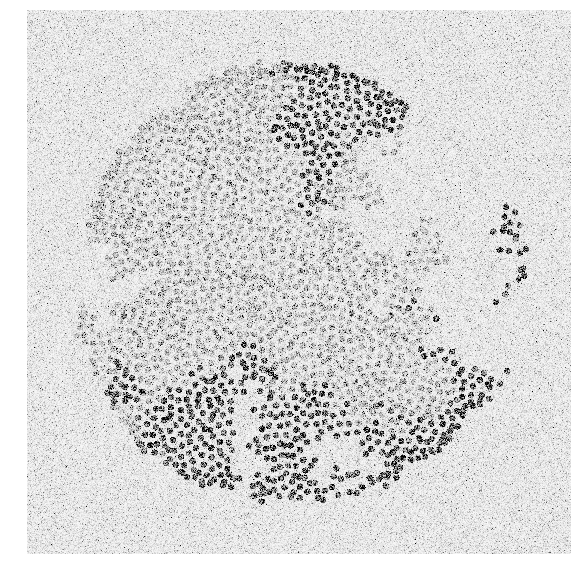

In [306]:
image.render(size=10)

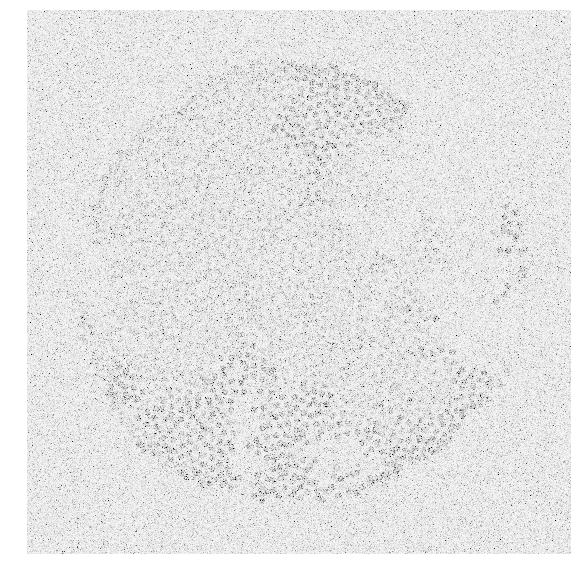

In [318]:
conditioned_image = ConditionalImage(image)
conditioned_image.resample(mu=0.5, sigma=0.5, rho=0.5)
conditioned_image.render(size=10)

In [273]:
class ConditionalSampler:
    """
    Class for sampling y conditioned on an existing sample x. 
    """
    def __init__(self, x):
        self.x = x
        self.mu_x = x.mean()
        self.sigma_x = x.std()
        
    def sample(self, mu_y, sigma_y, rho=0.0):
        """ Sample y conditioned upon x. """
        mu = mu_y + (rho*sigma_y/self.sigma_x)*(self.x - self.mu_x)
        sigma = np.sqrt((1-rho**2)*(sigma_y**2))
        return mu + sigma * np.random.normal(size=self.x.size)
    
class ConditionalLogSampler(ConditionalSampler):
    
    def __init__(self, x):
        super().__init__(np.log(x))
        
    def sample(self, mu_y, sigma_y, rho=0.0):
        """ Sample y conditioned upon x. """
        return np.exp(super().sample(np.log(mu_y), sigma_y, rho=rho))

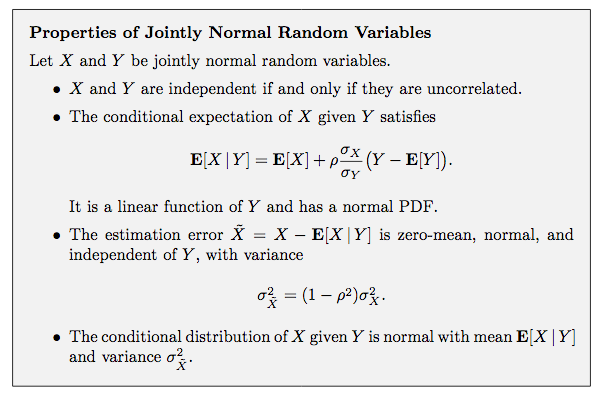

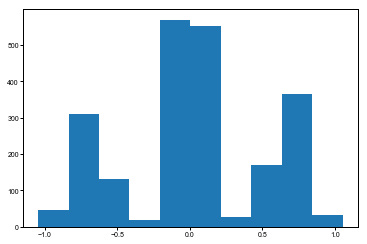

In [182]:
_ = plt.hist(np.log(fluorescence_levels[:, 0]))

In [ ]:
y = mean_y + std_y times 
 N(0, 1)

In [ ]:
So E(x_1 | x_2) = mu_1 + rho times sigma_1/sigma_2 times (x_2 - mu_2) = 1 + 0.83 
times x_2 after substituting values. Also the conditional variance 
var(x_1 | x_2) = 1 - rho^2 = 1 - 0.83^2 (i.e. same for all x_2). 
(Conditional variance is stated for mu_1 = mu_2 = 0, but it's the same no matter what mu_1 and mu_2 are.)

So for your problem, take x as a given, then compute mean_y = 1 + 0.83 times x, 
 and std_y = sqrt(var(y|x)) = sqrt(1 - 0.83^2), and generate y = mean_y + std_y times 
 N(0, 1), where N(0, 1) = sample from a normal distribution with mean 0 and variance 1.

In [137]:
from pomegranate.distributions import MultivariateGaussianDistribution

In [ ]:
MultivariateGaussianDistribution

In [124]:
fluorescence_levels.T

array([[0.93536236, 1.25062244, 0.88089847, ..., 1.60015142, 1.80888683,
        1.26362571],
       [0.93536236, 1.25062244, 0.88089847, ..., 0.80007571, 0.90444341,
        0.63181286]])

In [36]:
xx, yy = np.array(np.meshgrid(*2*(range(-5, 5+1),)))
xx += nucleus.xy[0]
yy += nucleus.xy[1]

circle_mask = disk(5)

#fill_indices = (xx[circle_mask].ravel(), yy[circle_mask].ravel())

In [37]:
circle_mask

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

In [40]:
xx[circle_mask.astype(bool)]

array([296, 293, 294, 295, 296, 297, 298, 299, 292, 293, 294, 295, 296,
       297, 298, 299, 300, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       292, 293, 294, 295, 296, 297, 298, 299, 300, 291, 292, 293, 294,
       295, 296, 297, 298, 299, 300, 301, 292, 293, 294, 295, 296, 297,
       298, 299, 300, 292, 293, 294, 295, 296, 297, 298, 299, 300, 292,
       293, 294, 295, 296, 297, 298, 299, 300, 293, 294, 295, 296, 297,
       298, 299, 296])

In [ ]:
indices[0]

In [ ]:
plt.scatter(indices[0], indices[1])

KeyboardInterrupt: 

In [733]:
2*(range(-5, 5),)

(range(-5, 5), range(-5, 5))

In [680]:
mask = np.ones((dim, dim)) * -1
mask[pos[0], pos[1]] = measurements.index.values

In [681]:
radius = 6
struct = disk(radius)
mask = maximum_filter(mask, footprint=struct)

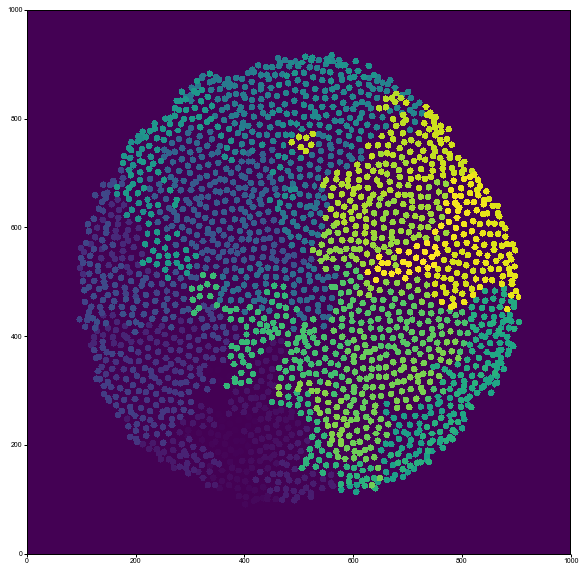

In [682]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mask)
ax.invert_yaxis()

In [711]:
xy

array([-0.50756298, -0.37510778])

In [712]:
nucleus = Nucleus(xy=xy[0], genotype=1, radius=6)

In [ ]:
def covariance_matrix(sigma, rho):
    """ Returns bivariate covariance matrix for given values of <sigma> and <rho>. """
    cov = np.zeros((2, 2))
    cov[np.eye(2).astype(bool)] = sigma ** 2
    cov[np.flipud(cov.astype(bool))] = np.product(sigma) * rho
    return cov

mu = np.array([0., 0.])
sigma = np.array([.3, .3])
rho = 0.1
cov = covariance_matrix(sigma, rho)
cov

dim = 1000
sample = np.exp(np.random.multivariate_normal(mu, cov, size=dim**2))

In [604]:
radius = 5
np.pi * (radius ** 2)

78.53981633974483

In [586]:
from scipy.ndimage import grey_dilation, maximum_filter
from scipy.ndimage import generate_binary_structure

In [584]:
mask.min()

0.0

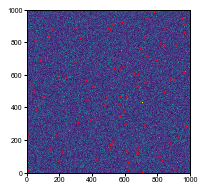

In [546]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(im[0])
ax.invert_yaxis()


ax.scatter(*xy, s=1, c='r')

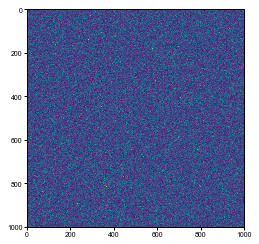

In [535]:
plt.imshow(im[1])

In [ ]:
scipy.ndi

In [461]:
sample

array([[2.44213962, 2.85555194],
       [2.99506096, 2.71872985],
       [2.72215361, 2.68011198],
       ...,
       [2.62970486, 2.4427803 ],
       [2.7398705 , 2.76272769],
       [2.99553189, 2.92165933]])